In [95]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [96]:
movies=pd.read_csv('Movies.csv')

In [97]:
movies=movies.drop_duplicates()
movies['Budget']=pd.to_numeric(movies['Budget'], errors='coerce')

In [98]:
#Создаю столбец показателя окупаемости инвестиций (по бюджету)
movies['ROI']=(movies['Tickets_sold, (mln. $)']*1000000-movies['Budget'])/movies['Budget']*100
movies=movies.dropna(subset='ROI')

In [99]:
#Удаляю выбросы
q1=movies['ROI'].quantile(0.25)
q3=movies['ROI'].quantile(0.75)
iqr=q3-q1

low=q1-1.5*iqr
up=q3+1.5*iqr

movies_filtered=movies[(movies['ROI']>=low)&(movies['ROI']<=up)]

In [100]:
movies_filtered['Budget_Category']=pd.cut(movies_filtered['Budget'], bins=[-float('inf'), 10e6, 50e6, 100e6, float('inf')],labels=['низкобюджетные', 'среднебюджетные', 'высокобюджетные', 'блокбастеры'])

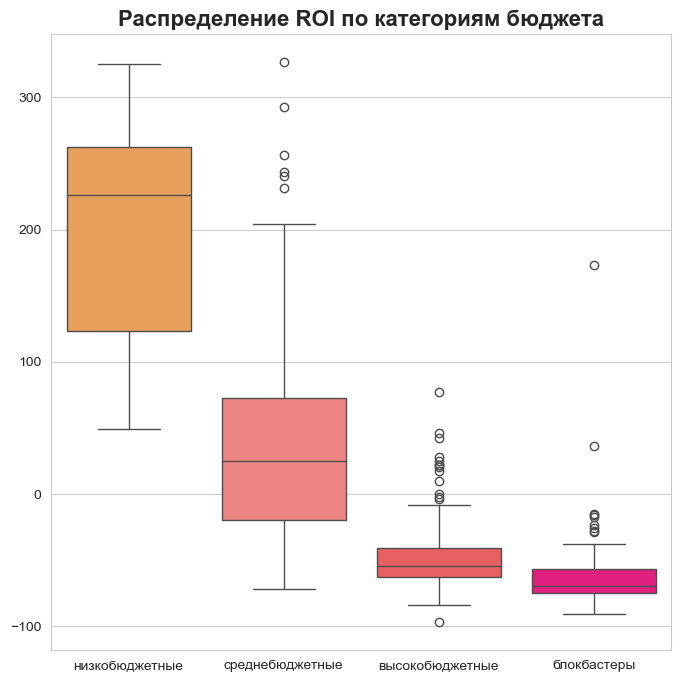

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")
palette=sns.color_palette(["#FF9F45", "#FF7272", "#FF4A4A", "#FF007F"])

sns.boxplot(data=movies_filtered, x='Budget_Category', y='ROI', palette=palette)

plt.title('Распределение ROI по категориям бюджета', fontsize=16, fontweight='semibold')
plt.xlabel('')
plt.ylabel('', fontsize=12)

plt.show()

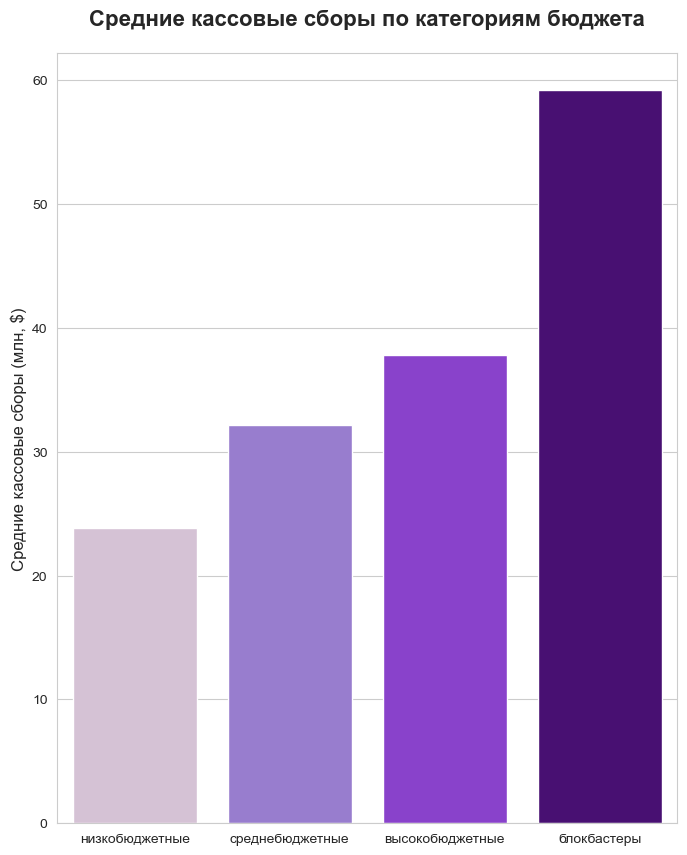

In [117]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 10))

palette=sns.color_palette(["#D8BFD8", "#9370DB", "#8A2BE2", "#4B0082"])

sns.barplot(data=movies_filtered, x='Budget_Category', y='Tickets_sold, (mln. $)', 
            estimator='mean', palette=palette, ci=None)

plt.title('Средние кассовые сборы по категориям бюджета', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('Средние кассовые сборы (млн, $)', fontsize=12)

plt.show()

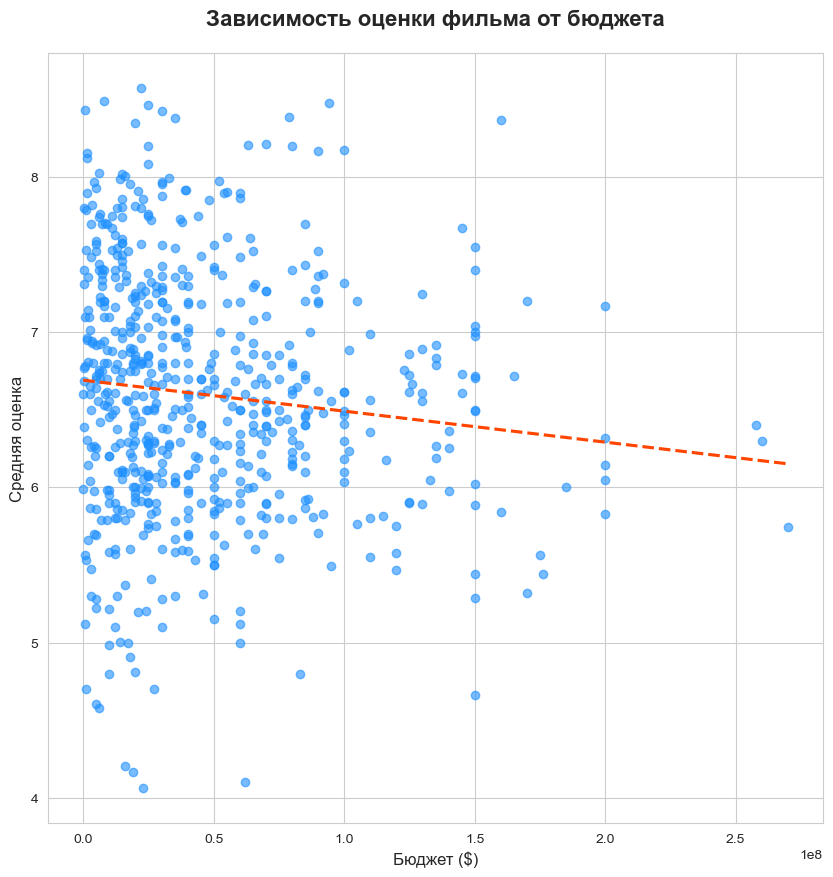

In [145]:
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")

plt.scatter(data=movies, x='Budget', y='Vote_average', alpha=0.6, color='#1E90FF')
sns.regplot(data=movies, x='Budget', y='Vote_average', scatter=False, color='#FF4500', line_kws={'linestyle': '--'}, ci=None)

plt.title('Зависимость оценки фильма от бюджета', fontweight='bold', fontsize=16, pad=20)
plt.xlabel('Бюджет ($)', fontsize=12)
plt.ylabel('Средняя оценка', fontsize=12)

plt.show()

In [148]:
import scipy.stats as stats

correlation, p_value=stats.pearsonr(movies['Budget'], movies['Vote_average']) #высчитываю коэффициент корреляции и его значимость

print(round(correlation, 2), round(p_value, 2)*100)

-0.11 0.0
